<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AG1_Grupo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PauForestal/master_bdds/main/Modulo2/worlddometer_covid_ue.csv', sep=';', decimal=',')

In [3]:
df

,Num,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,0,Europe,"3,543,710",10.493,207.347,149.0,"2,063,335","1,273,028",5.619,NaN,NaN,NaN,NaN,NaN
1,1,Russia,"990,326",4.980,17.093,68.0,"806,982","166,251",2.300,6.786,117.000,"36,400,000","249,409","145,944,843"
2,2,Spain,"455,621",NaN,29.011,NaN,NaN,NaN,751.000,9.744,620.000,"8,517,446","182,161","46,757,783"
3,3,UK,"332,752",NaN,41.498,NaN,NaN,NaN,60.000,4.897,611.000,"16,273,209","239,508","67,944,393"
4,4,France,"272,530",NaN,30.602,NaN,"86,177","155,751",387.000,4.174,469.000,"6,175,223","94,571","65,297,356"
5,5,Italy,"266,853",NaN,35.473,NaN,"208,224","23,156",79.000,4.415,587.000,"8,509,618","140,778","60,447,003"
6,6,Germany,"242,825",NaN,9.363,NaN,"217,484","15,978",245.000,2.897,112.000,"11,208,091","133,703","83,828,051"
7,7,Ukraine,"119,074",2.096,2.527,35.0,"56,734","59,813",177.000,2.725,58.000,"1,536,171","35,161","43,689,434"
8,8,Romania,"86,785",952.000,3.578,39.0,"37,665","45,542",492.000,4.516,186.000,"1,795,633","93,445","19,216,003"
9,9,Belgium,"84,599",647.000,9.891,5.0,"18,403","56,305",72.000,7.294,853.000,"2,261,043","194,953","11,597,901"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Num                     49 non-null     int64  
 1   Country                 49 non-null     object 
 2   Total Cases             49 non-null     object 
 3   New Cases               17 non-null     float64
 4   Total Deaths            46 non-null     float64
 5   New Deaths              7 non-null      float64
 6   Total Recovered         45 non-null     object 
 7   Active Cases            45 non-null     object 
 8   Serious Critical        37 non-null     float64
 9   Total Cases per 1M pop  48 non-null     float64
 10  Deaths per 1M pop       45 non-null     float64
 11  Total Tests             47 non-null     object 
 12  Tests per 1M pop        47 non-null     object 
 13  Population              48 non-null     object 
dtypes: float64(6), int64(1), object(7)
memory us

In [5]:
# Devuelve la variabilidad de cada variable. Ej: variable Country toma 49 valores distintos.
df.nunique()

Num                       49
Country                   49
Total Cases               49
New Cases                 15
Total Deaths              45
New Deaths                 6
Total Recovered           45
Active Cases              44
Serious Critical          29
Total Cases per 1M pop    48
Deaths per 1M pop         41
Total Tests               47
Tests per 1M pop          47
Population                48
dtype: int64

In [6]:
# Para evaluar qué porcentaje de los datos son NaN
df.isna().sum(axis=0)/len(df)

Num                       0.000000
Country                   0.000000
Total Cases               0.000000
New Cases                 0.653061
Total Deaths              0.061224
New Deaths                0.857143
Total Recovered           0.081633
Active Cases              0.081633
Serious Critical          0.244898
Total Cases per 1M pop    0.020408
Deaths per 1M pop         0.081633
Total Tests               0.040816
Tests per 1M pop          0.040816
Population                0.020408
dtype: float64

In [7]:
# Crea una lista con el nombre de la variable y la cantidad de nulls que contiene
list1 = []

for i in df.columns:
    null = sum(pd.isnull(df[i]))
    null1 = i + ': ' + str(null)
    list1.append(null1)
    
list1

['Num: 0',
 'Country: 0',
 'Total Cases: 0',
 'New Cases: 32',
 'Total Deaths: 3',
 'New Deaths: 42',
 'Total Recovered: 4',
 'Active Cases: 4',
 'Serious Critical: 12',
 'Total Cases per 1M pop: 1',
 'Deaths per 1M pop: 4',
 'Total Tests: 2',
 'Tests per 1M pop: 2',
 'Population : 1']

In [8]:
df_num = df.describe(include=np.number)
df_num.loc['isnull'] = df.isnull().sum()
df_num = pd.DataFrame(df_num)
df_num

,Num,New Cases,Total Deaths,New Deaths,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop
count,49.00000,17.000000,46.000000,7.000000,37.000000,48.000000,45.000000
mean,24.00000,202.033471,196.501326,42.571429,89.916730,68.105542,194.605267
std,14.28869,285.670090,265.986505,53.090668,175.918556,212.860839,214.483793
min,0.00000,2.096000,1.000000,1.000000,1.000000,1.058000,1.237000
25%,12.00000,10.493000,9.918250,3.000000,3.000000,2.896500,48.000000
50%,24.00000,34.000000,45.000000,35.000000,19.000000,4.682500,96.000000
75%,36.00000,292.000000,272.250000,53.500000,61.000000,8.330250,276.000000
max,48.00000,952.000000,990.000000,149.000000,751.000000,958.000000,853.000000
isnull,0.00000,32.000000,3.000000,42.000000,12.000000,1.000000,4.000000


#### REPLACING THE MISSING VALUES, USING MEAN FOR CONTINOUS VARIABLES AND MODE FOR CATEGORICAL VARIABLES.

```
for i in df.columns:
    clas = df[i].dtypes
    if clas == 'object':
      try:
        i.astype('float64')
        df[i].fillna(df[i].mode()[0], inplace=True)
      except:
        pass
    else:
        df[i].fillna(df[i].mean(), inplace=True)
```



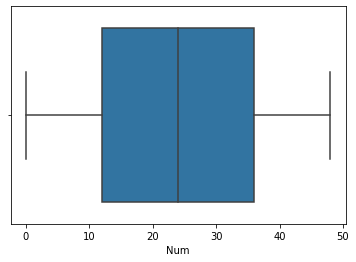

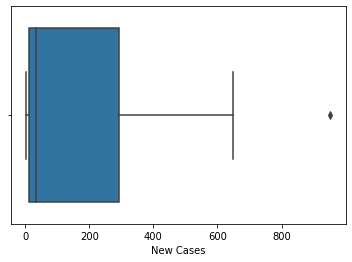

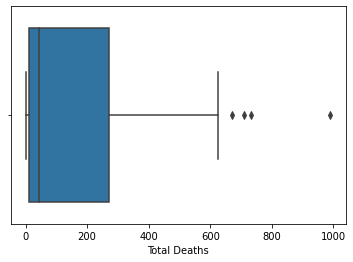

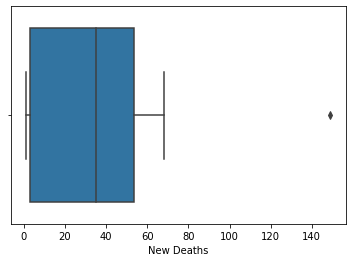

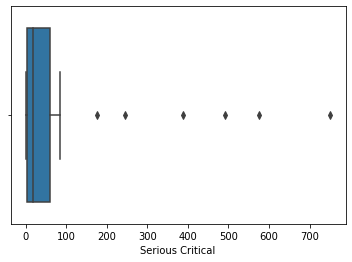

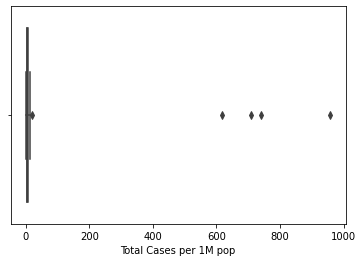

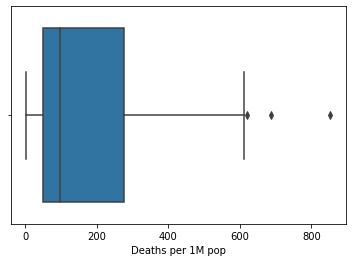

In [9]:
for i in df.columns:
    clas = df[i].dtypes
    
    if clas == 'object':
        pass
    else:
        sns.boxplot(x=df[i])
        plt.show()

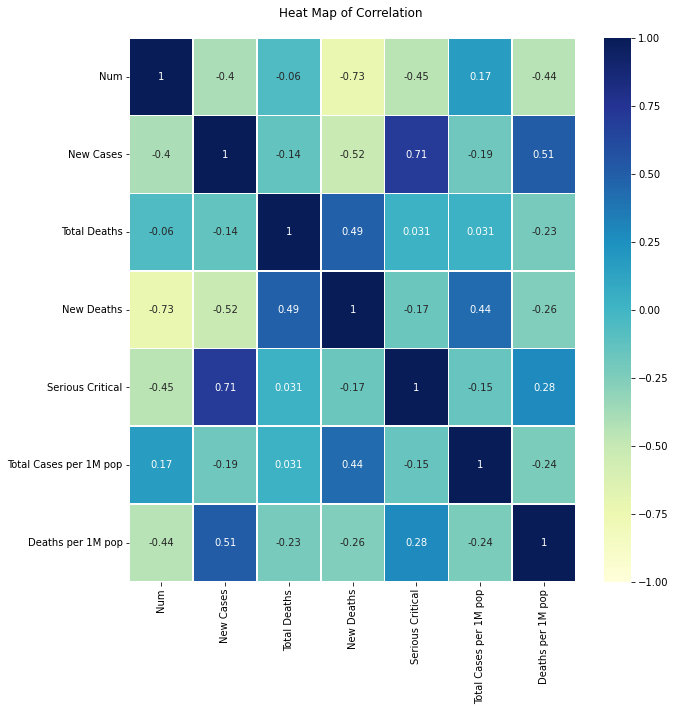

In [10]:
# # Pairplot using s
corr = df.corr();
#print(corr)
# sns.heatmap(corr, annot = True);
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.title('Heat Map of Correlation \n')
sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [11]:
df.describe(include=np.object)

,Country,Total Cases,Total Recovered,Active Cases,Total Tests,Tests per 1M pop,Population
count,49,49,45,45,47,47,48
unique,49,49,45,44,47,47,48
top,Europe,"3,543,710","2,063,335",0,"36,400,000","249,409","145,944,843"
freq,1,1,1,2,1,1,1


In [17]:
#Función que permite calcular las medidas de tendencia central, según la columna que se le pase.
def central_tendency(col):
    mean = f'MEAN: {round(df[col].mean(),2)}'
    median = f'MEDIAN: {df[col].median()}'
    print(f'Tendencia Central:\n{mean}\n{median}\n')

#Función para determinar las medidas de dispersión. Permite calcularlas según la columna que se quiera analizar.
def dispersion_measure(col):
    range = np.max(df[col]) - np.min(df[col])
    variance = round(np.var(df[col], ddof=1),2)
    standard_deviation = round(np.std(df[col], ddof=1),2)
    cv = '{:.2%}'.format(standard_deviation / np.mean(df[col]))
    print(f'Medidas de dispersión:\n\nRANGO: {range}\nVARIANZA: {variance}\nDESVIACIÓN ESTÁNDAR: {standard_deviation}\nCOEFICIENTE DE VARIACIÓN: {cv}\n')

#Función para determinar las medidas de posición. Permite calcularlas según la columna que se quiera analizar.
def position_measure(col):
  IQR = ss.iqr(df[col], interpolation='midpoint')
  #Q1 = np.percentile(df[col], 25, interpolation='midpoint')
  Q1 = df[col].quantile(0.25)
  #D3 = np.percentile(df[col], 90, interpolation='midpoint')
  D3 = df[col].quantile(0.3)
  print(f'Medidas de Posición:\nIQR: {IQR}\nQ1: {Q1}\nD3: {D3}\n')

#Función para determinar las medidas de distribución. Permite calcularlas según la columna que se quiera analizar.
def distribution_measure(col):
    asimetria = round(df[col].skew(), 3)
    curtosis = round(df[col].kurt(), 3)
    print(f'Medidas de distribución (o concentración y forma):\n\nASIMETRIA: {asimetria},\nCURTOSIS: {curtosis}\n')

def plots(col):
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()

    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df[col])
    plt.title(f'Gráfico de Distribución de la variable {col}')
    plt.axvline(mean, color='red', label='Mean')
    plt.axvline(median, color='green', label='Median', linestyle = '--')
  
    plt.legend()
    plt.show()

def boxplot(col):
    data = df[col]
    bp = plt.boxplot(data, showmeans=True)

    medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
    means = [round(item.get_ydata()[0], 1) for item in bp['means']]
    minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
    maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
    q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
    q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
    fliers = [item.get_ydata() for item in bp['fliers']]
    lower_outliers = []
    upper_outliers = []

    for i in range(len(fliers)):
        lower_outliers_by_box = []
        upper_outliers_by_box = []
        for outlier in fliers[i]:
            if outlier < q1[i]:
                lower_outliers_by_box.append(round(outlier, 1))
            else:
                upper_outliers_by_box.append(round(outlier, 1))
        lower_outliers.append(lower_outliers_by_box)
        upper_outliers.append(upper_outliers_by_box)    
        
    stats = [medians, means, minimums, maximums, q1, q3, lower_outliers, upper_outliers]
    stats_names = ['Median', 'Mean', 'Minimum', 'Maximum', 'Q1', 'Q3', 'Lower outliers', 'Upper outliers']

    for j in range(len(stats)):
        print(f'{stats_names[j]}: {stats[j][i]}')
    plt.show()
    print('\n')

ANÁLISIS DESCRIPTIVO DE NUM:

Tendencia Central:
MEAN: 24.0
MEDIAN: 24.0

Medidas de dispersión:

RANGO: 48
VARIANZA: 204.17
DESVIACIÓN ESTÁNDAR: 14.29
COEFICIENTE DE VARIACIÓN: 59.54%

Medidas de Posición:
IQR: 24.0
Q1: 12.0
D3: 14.399999999999999

Medidas de distribución (o concentración y forma):

ASIMETRIA: 0.0,
CURTOSIS: -1.2



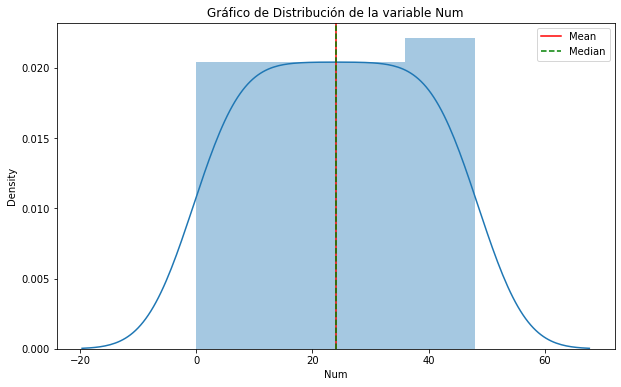

ANÁLISIS DESCRIPTIVO DE NEW CASES:

Tendencia Central:
MEAN: 202.03
MEDIAN: 34.0

Medidas de dispersión:

RANGO: 949.904
VARIANZA: 81607.4
DESVIACIÓN ESTÁNDAR: 285.67
COEFICIENTE DE VARIACIÓN: 141.40%

Medidas de Posición:
IQR: nan
Q1: 10.493
D3: 11.698599999999999

Medidas de distribución (o concentración y forma):

ASIMETRIA: 1.602,
CURTOSIS: 1.832



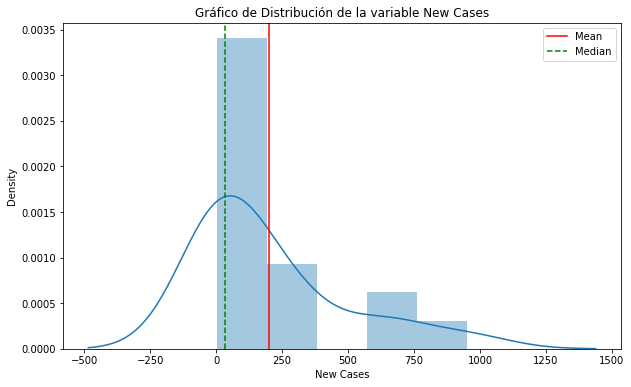

ANÁLISIS DESCRIPTIVO DE TOTAL DEATHS:

Tendencia Central:
MEAN: 196.5
MEDIAN: 45.0

Medidas de dispersión:

RANGO: 989.0
VARIANZA: 70748.82
DESVIACIÓN ESTÁNDAR: 265.99
COEFICIENTE DE VARIACIÓN: 135.36%

Medidas de Posición:
IQR: nan
Q1: 9.91825
D3: 14.0465

Medidas de distribución (o concentración y forma):

ASIMETRIA: 1.366,
CURTOSIS: 0.704



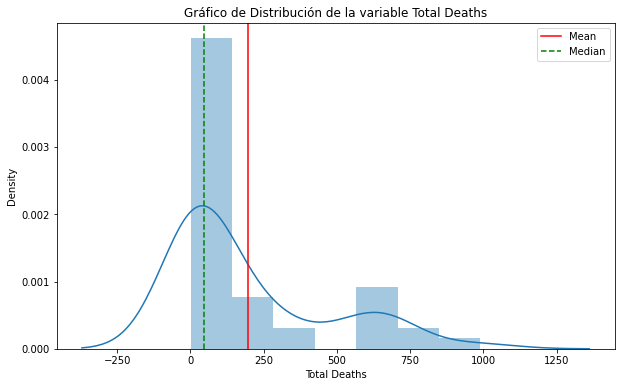

ANÁLISIS DESCRIPTIVO DE NEW DEATHS:

Tendencia Central:
MEAN: 42.57
MEDIAN: 35.0

Medidas de dispersión:

RANGO: 148.0
VARIANZA: 2818.62
DESVIACIÓN ESTÁNDAR: 53.09
COEFICIENTE DE VARIACIÓN: 124.71%

Medidas de Posición:
IQR: nan
Q1: 3.0
D3: 4.199999999999999

Medidas de distribución (o concentración y forma):

ASIMETRIA: 1.598,
CURTOSIS: 2.629



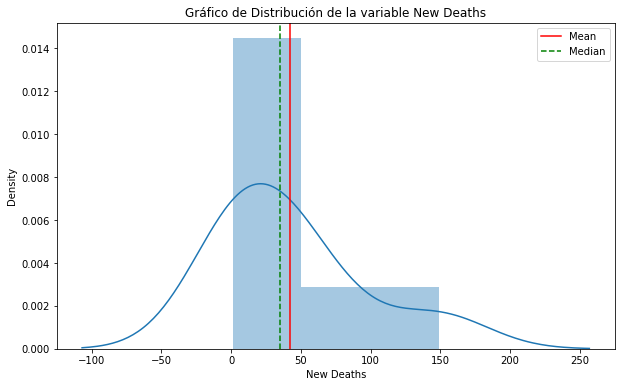

ANÁLISIS DESCRIPTIVO DE SERIOUS CRITICAL:

Tendencia Central:
MEAN: 89.92
MEDIAN: 19.0

Medidas de dispersión:

RANGO: 750.0
VARIANZA: 30947.34
DESVIACIÓN ESTÁNDAR: 175.92
COEFICIENTE DE VARIACIÓN: 195.65%

Medidas de Posición:
IQR: nan
Q1: 3.0
D3: 4.799999999999999

Medidas de distribución (o concentración y forma):

ASIMETRIA: 2.62,
CURTOSIS: 6.396



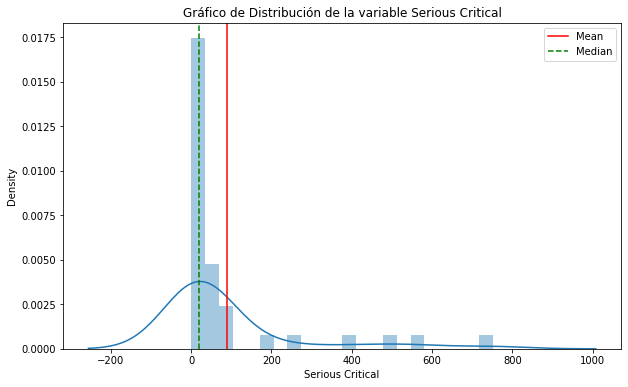

ANÁLISIS DESCRIPTIVO DE TOTAL CASES PER 1M POP:

Tendencia Central:
MEAN: 68.11
MEDIAN: 4.6825

Medidas de dispersión:

RANGO: 956.942
VARIANZA: 45309.74
DESVIACIÓN ESTÁNDAR: 212.86
COEFICIENTE DE VARIACIÓN: 312.54%

Medidas de Posición:
IQR: nan
Q1: 2.8964999999999996
D3: 3.2334

Medidas de distribución (o concentración y forma):

ASIMETRIA: 3.285,
CURTOSIS: 9.659



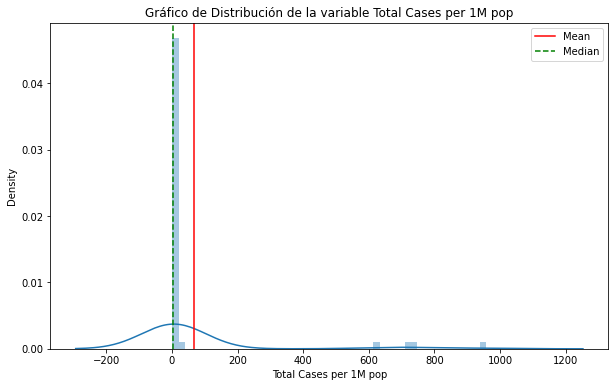

ANÁLISIS DESCRIPTIVO DE DEATHS PER 1M POP:

Tendencia Central:
MEAN: 194.61
MEDIAN: 96.0

Medidas de dispersión:

RANGO: 851.763
VARIANZA: 46003.3
DESVIACIÓN ESTÁNDAR: 214.48
COEFICIENTE DE VARIACIÓN: 110.21%

Medidas de Posición:
IQR: nan
Q1: 48.0
D3: 54.8

Medidas de distribución (o concentración y forma):

ASIMETRIA: 1.492,
CURTOSIS: 1.391



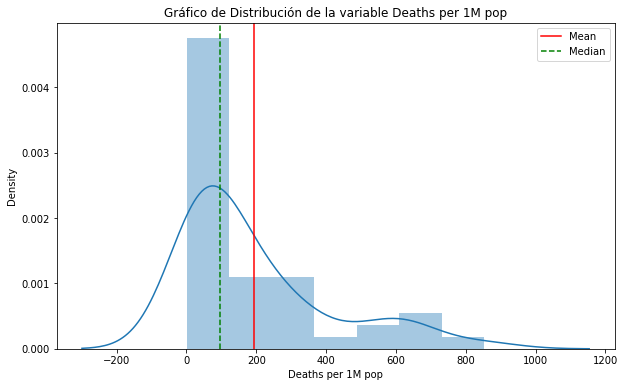

In [20]:
#Iteración para identificar las columnas numéricas y excluir el id. Las columnas resultantes entran a la función anteriormente descrita, para tener una visión general de ellas.
for col, types in df.dtypes.items():
    if col != 'Fecha_anual' and types != 'object':
        print(f'ANÁLISIS DESCRIPTIVO DE {col.upper()}:\n')
        central_tendency(col)
        dispersion_measure(col)
        position_measure(col)
        distribution_measure(col)
        plots(col)